In [1]:
import os
import pandas as pd
from tqdm import tqdm
import librosa
import numpy as np

In [2]:
df=pd.read_csv('data set final//100.csv')

In [3]:
df.head(20)

label           0           1          2          3          4          5  \
0   real -373.291901  158.646530 -17.047791  34.233822  -8.182767  15.503440   
1   real -257.112366  108.230965 -29.057369  63.792709 -37.121563  29.447456   
2   real -345.402252  137.953705 -25.103971  67.694756 -11.369492   1.740767   
3   real -198.856689  148.829468 -25.708015  64.691963 -24.406643   6.954962   
4   real -229.966492  175.980713 -64.785088  27.349848 -27.212543   4.636209   
5   real -264.880249  168.332748 -21.043079  46.320900 -17.710178  29.558903   
6   real -337.790833  156.700928 -20.609015  63.492508 -18.910759  11.353045   
7   real -290.940674  153.509399 -89.072327  52.393158 -20.812258 -12.461077   
8   real -212.753525  128.157837 -57.566204  68.430870 -31.317141   7.048017   
9   real -347.231140  144.970428 -22.021412  47.481556 -18.030035   7.231033   
10  real -205.608261  139.364059 -29.618052  55.047413 -27.950024  15.484082   
11  real -327.961334  178.320831 -32.371742  20.921246  -6.023405  -9.423947   
12  real -422.184265  107.155869 -68.618980  54.048199 -45.289963  14.228322   
13  real -320.888214  144.642883   0.634704  34.068794 -15.238256  14.321245   
14  real -321.656708  120.121819 -47.441734  25.118481 -36.345112 -16.117985   
15  real -318.078613  151.795639 -26.595245  65.747704 -32.309803  13.962420   
16  real -241.774673  157.625717 -33.632957  69.492302  -9.007143  24.738550   
17  real -361.085999  159.535812 -37.369045  37.802311 -14.823876 -12.244569   
18  real -124.943512  195.324448 -17.925638  20.671715 -13.518152  17.640085   
19  real -194.018448  128.707428 -21.579798  29.323523 -21.638271   6.740359   

            6          7          8  ...        90        91        92  \
0  -22.185364   5.002247  -5.036248  ... -0.709012 -0.650165 -1.127420   
1  -26.359976   4.819491  -4.422941  ... -0.180776 -0.168121 -0.214899   
2  -17.523827  -9.158915  -5.950093  ... -0.267044 -0.180012 -0.037583   
3  -22.024382  -6.334054  -5.589320  ... -0.360848 -0.680164 -0.531722   
4  -20.719147  -9.610486   3.434626  ... -0.354644 -0.667357 -0.349148   
5  -17.957668  -7.336164  -4.727747  ... -0.332415  0.410440 -0.998541   
6  -12.809472  -1.981154  -4.048272  ... -0.640975 -0.806109 -0.656926   
7  -15.340408 -21.264023  -9.194129  ...  0.051434 -0.653878 -1.190719   
8  -24.536892  -1.105931 -15.610588  ... -0.133478 -1.075100 -0.217735   
9  -11.004048   3.390760 -10.902551  ...  0.216129  0.164328 -0.129633   
10 -24.415234  -2.139121  -1.764283  ...  0.633529  0.484878  0.956947   
11 -14.599585 -13.043722  -8.501114  ... -0.192276  0.332114  0.377790   
12 -22.652077 -12.539742 -12.718556  ...  0.334706  0.033861 -0.219892   
13 -22.523834 -17.214027  -3.000615  ... -1.188137 -0.744596 -1.312248   
14 -30.839548 -14.850468 -17.715384  ...  0.349967  0.112472 -0.068740   
15 -12.801643  -3.442953 -11.124983  ... -0.130837 -0.014838 -0.477363   
16 -12.980028   4.386376 -16.905939  ...  0.078477  0.007354 -0.166557   
17  -4.337741  -8.509977 -10.557510  ... -0.638079 -0.694764 -0.580651   
18 -25.943316 -11.522733  -3.726508  ... -0.029854 -0.258967 -0.143152   
19 -24.435127 -14.819491  -3.232594  ... -0.708401 -0.825089 -0.514993   

          93        94        95        96        97        98        99  
0  -0.765018 -0.193053 -0.061465 -0.225423 -1.684210 -1.215355  0.670340  
1   0.364043  0.034777 -0.452580  0.000929 -0.370667 -0.555596 -0.332448  
2  -0.456223 -0.201328  0.051953 -0.264314 -0.563842 -0.381785 -0.218973  
3  -0.399997 -0.359128 -0.148390 -0.361057 -0.367214 -0.634921 -0.707325  
4  -0.396463 -0.427097 -0.307728  0.056355 -0.106217 -0.604947 -0.400508  
5  -0.932985  0.649041 -0.309264 -0.765319 -1.184454 -0.997475 -1.245837  
6  -0.411067 -0.369991 -0.933032 -1.561549 -0.633505 -0.536007 -0.849537  
7  -0.933580 -0.513912 -0.770656 -0.640623 -0.736007 -1.109949 -0.949363  
8  -0.486192 -0.807895 -0.476039 -0.565627 -0.758499 -0.801607 -0.238471  
9  -0.252737 -0.0

In [5]:
### Split the dataset into independent and dependent dataset
X=np.array(df.drop(['label'],axis=1))
y=np.array(df['label'].tolist())

In [6]:

### Label Encoding
y=np.array(pd.get_dummies(y))

In [7]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_temp,y_train,y_temp=train_test_split(X,y,test_size=0.3,random_state=42,shuffle=True, stratify=y)
X_val,X_test,y_val,y_test=train_test_split(X_temp,y_temp,test_size=0.5,random_state=42,shuffle=True, stratify=y_temp)


In [8]:
X_test.shape

(23437, 100)

In [9]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [10]:
### No of classes
num_labels=y.shape[1]

In [11]:
num_labels

2

In [22]:
modelnn=Sequential()
###first layer
modelnn.add(Dense(100,input_shape=(100,)))
modelnn.add(Activation('relu'))
modelnn.add(Dropout(0.5))
###second layer
modelnn.add(Dense(200))
modelnn.add(Activation('relu'))
modelnn.add(Dropout(0.5))
###third layer
modelnn.add(Dense(100))
modelnn.add(Activation('relu'))
modelnn.add(Dropout(0.5))

###final layer
modelnn.add(Dense(num_labels))
modelnn.add(Activation('softmax'))


In [13]:
modelnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               10100     
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [14]:
X_train.shape

(109370, 100)

In [23]:
modelnn.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [24]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 20
num_batch_size = 64

start = datetime.now()

history = modelnn.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_val, y_val), verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/20
1709/1709 [==============================] - 10s 5ms/step - loss: 0.5192 - accuracy: 0.8909 - val_loss: 0.1862 - val_accuracy: 0.9151
Epoch 2/20
1709/1709 [==============================] - 7s 4ms/step - loss: 0.1905 - accuracy: 0.9233 - val_loss: 0.1273 - val_accuracy: 0.9499
Epoch 3/20
1709/1709 [==============================] - 9s 5ms/step - loss: 0.1588 - accuracy: 0.9365 - val_loss: 0.1203 - val_accuracy: 0.9542
Epoch 4/20
1709/1709 [==============================] - 7s 4ms/step - loss: 0.1421 - accuracy: 0.9435 - val_loss: 0.1053 - val_accuracy: 0.9633
Epoch 5/20
1709/1709 [==============================] - 9s 5ms/step - loss: 0.1342 - accuracy: 0.9468 - val_loss: 0.1205 - val_accuracy: 0.9533
Epoch 6/20
1709/1709 [==============================] - 8s 4ms/step - loss: 0.1250 - accuracy: 0.9511 - val_loss: 0.0966 - val_accuracy: 0.9619
Epoch 7/20
1709/1709 [==============================] - 9s 5ms/step - loss: 0.1202 - accuracy: 0.9529 - val_loss: 0.0984 - val_accuracy

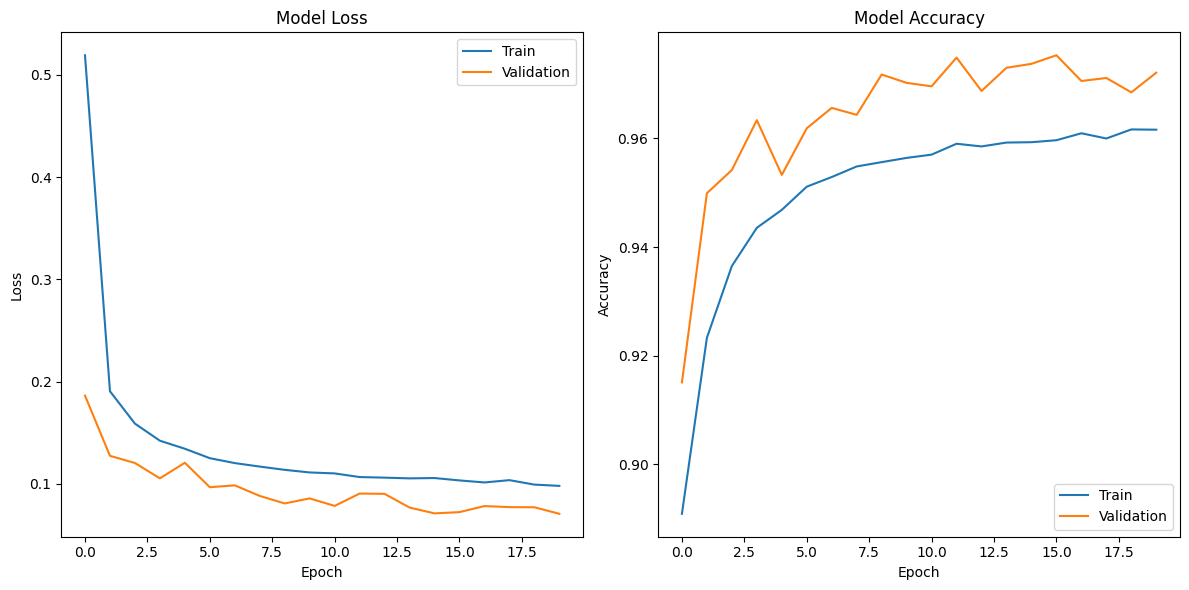

In [25]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()

In [ ]:
modelnn.save("nn.h5")

In [26]:
X_test.shape

(23437, 100)

In [27]:
X_test

array([[-3.21300659e+02,  9.07928391e+01, -6.45480394e+00, ...,
        -7.22709000e-01, -1.03800750e+00, -1.16318583e+00],
       [-2.97834412e+02,  5.65527191e+01,  1.59133301e+01, ...,
         3.49038482e-01,  2.65312642e-01, -2.90001988e-01],
       [-3.18214661e+02,  7.56504593e+01, -4.18440580e+00, ...,
        -5.76667786e-02, -4.95547652e-01, -2.70555168e-01],
       ...,
       [-3.08613251e+02,  2.85092144e+01,  1.31425858e+01, ...,
         2.49497876e-01, -1.76542625e-02, -4.52002347e-01],
       [-3.13934143e+02,  8.28421478e+01,  8.58222103e+00, ...,
         9.19673443e-01, -4.15751219e-01, -6.24862134e-01],
       [-3.57649384e+02,  7.33325348e+01, -6.83674622e+00, ...,
        -9.54495221e-02,  6.89864680e-02,  1.31589547e-01]])

733/733 [==============================] - 2s 3ms/step


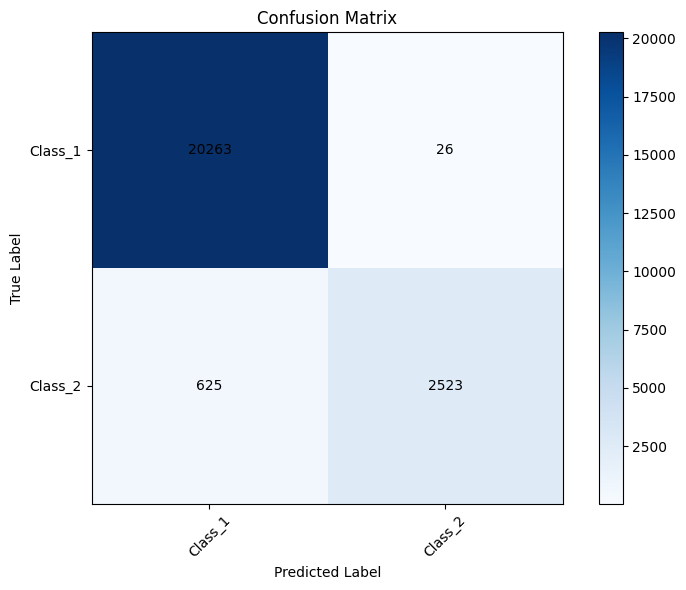

              precision    recall  f1-score   support

     Class_1       0.97      1.00      0.98     20289
     Class_2       0.99      0.80      0.89      3148

    accuracy                           0.97     23437
   macro avg       0.98      0.90      0.93     23437
weighted avg       0.97      0.97      0.97     23437



In [28]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model


y_pred=modelnn.predict(X_test)

y_pred_classes = np.argmax(y_pred, axis=1)

# Convert true labels to class labels
y_true_classes = np.argmax(y_test, axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

classes = ["Class_1", "Class_2"]  # Replace with your actual class names
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')

# Display the values on the plot
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment='center', verticalalignment='center')

plt.tight_layout()
plt.show()

# Print classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=classes))


## MFCC & 1D CNN

##With LR .001 and Adam optimizer



In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=10)

# Initialize a Sequential model
modelcnn = Sequential()

# Add a 1D convolutional layer
modelcnn.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
modelcnn.add(Flatten())

modelcnn.add(Dense(256, activation='relu'))


# Add a fully connected layer
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
modelcnn.add(Dense(64, activation='relu'))
modelcnn.add(Dropout(0.5))


modelcnn.add(Dense(32, activation='relu'))
modelcnn.add(Dropout(0.5))


# Add the output layer with softmax activation
modelcnn.add(Dense(2, activation='softmax'))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)
# Compile the model
modelcnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = modelcnn.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
6836/6836 [==============================] - 44s 6ms/step - loss: 0.1538 - accuracy: 0.9462 - val_loss: 0.0682 - val_accuracy: 0.9766
Epoch 2/20
6836/6836 [==============================] - 45s 7ms/step - loss: 0.0726 - accuracy: 0.9761 - val_loss: 0.0465 - val_accuracy: 0.9839
Epoch 3/20
6836/6836 [==============================] - 33s 5ms/step - loss: 0.0528 - accuracy: 0.9832 - val_loss: 0.0370 - val_accuracy: 0.9860
Epoch 4/20
6836/6836 [==============================] - 40s 6ms/step - loss: 0.0460 - accuracy: 0.9861 - val_loss: 0.0497 - val_accuracy: 0.9828
Epoch 5/20
6836/6836 [==============================] - 37s 5ms/step - loss: 0.0385 - accuracy: 0.9880 - val_loss: 0.0324 - val_accuracy: 0.9885
Epoch 6/20
6836/6836 [==============================] - 38s 6ms/step - loss: 0.0346 - accuracy: 0.9893 - val_loss: 0.0240 - val_accuracy: 0.9919
Epoch 7/20
6836/6836 [==============================] - 34s 5ms/step - loss: 0.0321 - accuracy: 0.9905 - val_loss: 0.0558 - val_ac

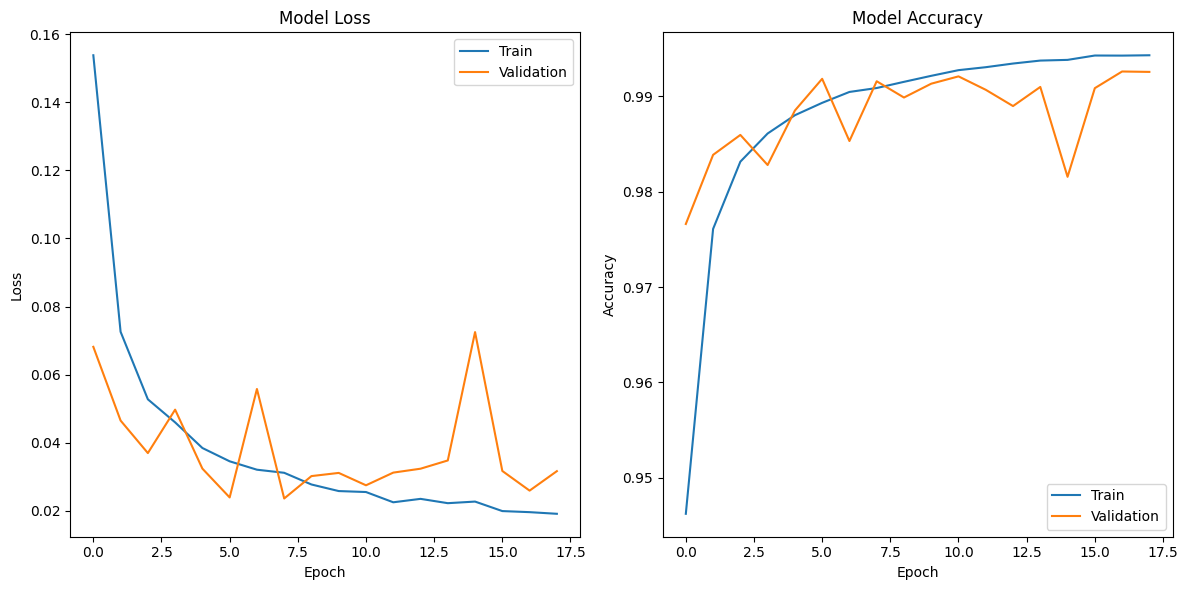

In [30]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


In [23]:
modelcnn.save("modelcnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


733/733 [==============================] - 1s 2ms/step
Test f1_score : 97.57%


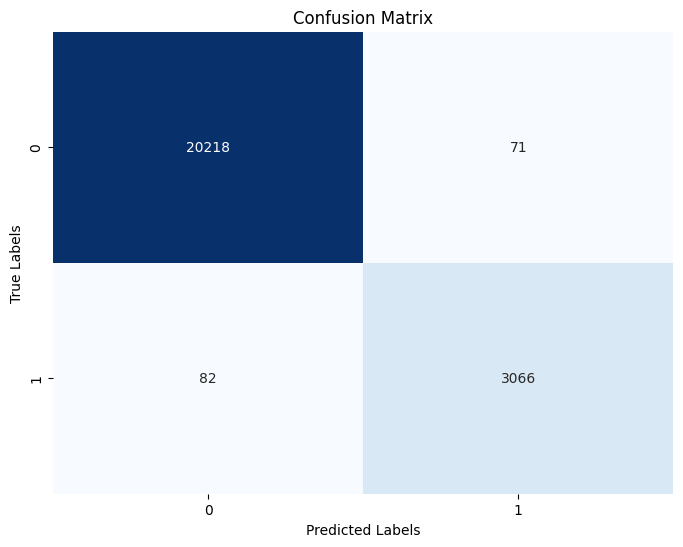

In [31]:
import seaborn as sns
# Evaluate the model on the test data
y_pred = modelcnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##With LR .0001 and Adam optimizer



In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=10)

# Initialize a Sequential model
modelcnn = Sequential()

# Add a 1D convolutional layer
modelcnn.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
modelcnn.add(Flatten())

modelcnn.add(Dense(256, activation='relu'))


# Add a fully connected layer
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
modelcnn.add(Dense(64, activation='relu'))
modelcnn.add(Dropout(0.5))


modelcnn.add(Dense(32, activation='relu'))
modelcnn.add(Dropout(0.5))


# Add the output layer with softmax activation
modelcnn.add(Dense(2, activation='softmax'))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001)
# Compile the model
modelcnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = modelcnn.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
6836/6836 [==============================] - 30s 4ms/step - loss: 0.1902 - accuracy: 0.9331 - val_loss: 0.0815 - val_accuracy: 0.9704
Epoch 2/20
6836/6836 [==============================] - 29s 4ms/step - loss: 0.0873 - accuracy: 0.9719 - val_loss: 0.0467 - val_accuracy: 0.9843
Epoch 3/20
6836/6836 [==============================] - 29s 4ms/step - loss: 0.0547 - accuracy: 0.9832 - val_loss: 0.0386 - val_accuracy: 0.9854
Epoch 4/20
6836/6836 [==============================] - 29s 4ms/step - loss: 0.0406 - accuracy: 0.9876 - val_loss: 0.0367 - val_accuracy: 0.9861
Epoch 5/20
6836/6836 [==============================] - 31s 5ms/step - loss: 0.0317 - accuracy: 0.9901 - val_loss: 0.0240 - val_accuracy: 0.9910
Epoch 6/20
6836/6836 [==============================] - 29s 4ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0566 - val_accuracy: 0.9790
Epoch 7/20
6836/6836 [==============================] - 29s 4ms/step - loss: 0.0246 - accuracy: 0.9925 - val_loss: 0.0228 - val_ac

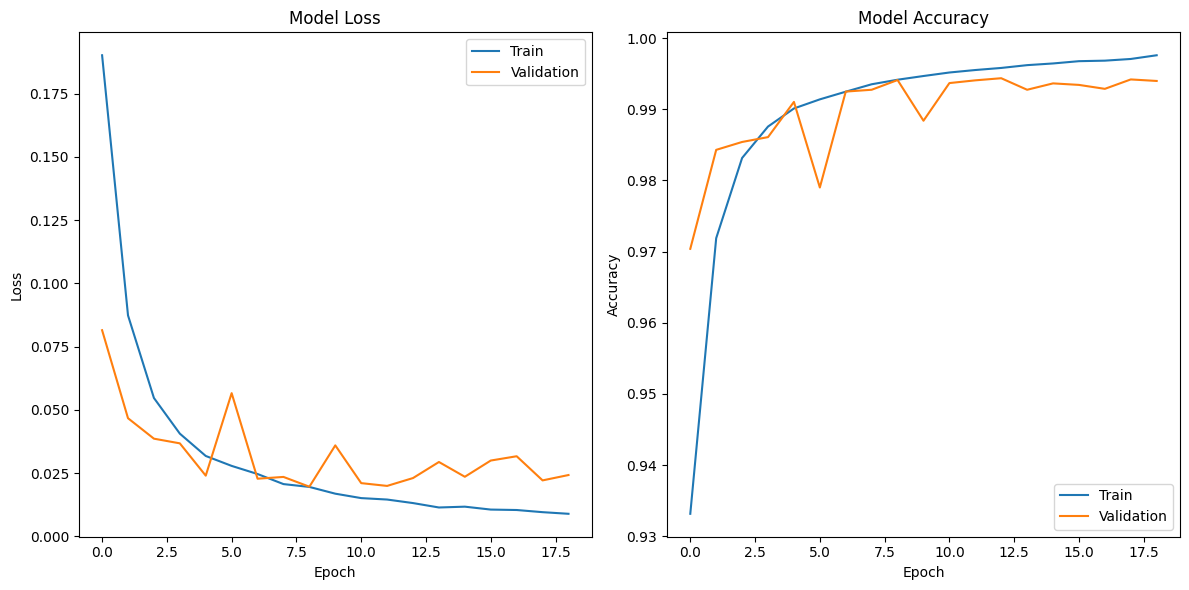

In [33]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
modelcnn.save("modelcnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


733/733 [==============================] - 1s 2ms/step
Test f1_score : 98.18%


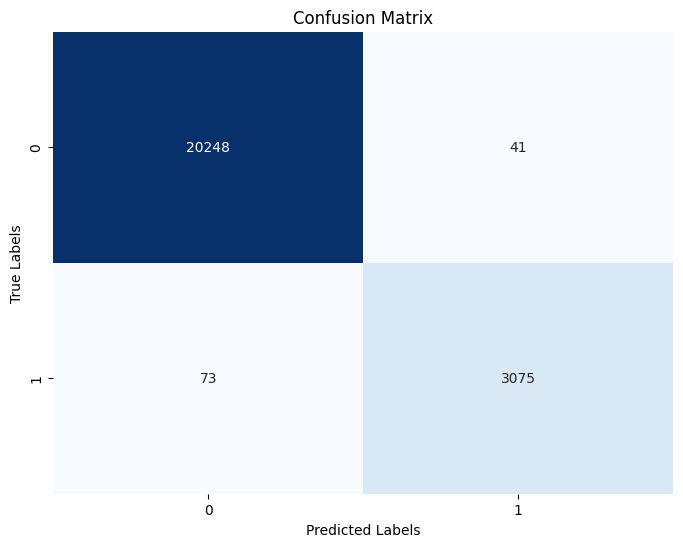

In [34]:
import seaborn as sns
# Evaluate the model on the test data
y_pred = modelcnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##With LR .00001 and Adam optimizer



In [36]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=10)

# Initialize a Sequential model
modelcnn = Sequential()

# Add a 1D convolutional layer
modelcnn.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
modelcnn.add(Flatten())

modelcnn.add(Dense(256, activation='relu'))


# Add a fully connected layer
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
modelcnn.add(Dense(64, activation='relu'))
modelcnn.add(Dropout(0.5))


modelcnn.add(Dense(32, activation='relu'))
modelcnn.add(Dropout(0.5))


# Add the output layer with softmax activation
modelcnn.add(Dense(2, activation='softmax'))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.00001)
# Compile the model
modelcnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = modelcnn.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
6836/6836 [==============================] - 30s 4ms/step - loss: 0.3450 - accuracy: 0.8792 - val_loss: 0.1714 - val_accuracy: 0.9395
Epoch 2/20
6836/6836 [==============================] - 31s 4ms/step - loss: 0.2009 - accuracy: 0.9345 - val_loss: 0.1186 - val_accuracy: 0.9579
Epoch 3/20
6836/6836 [==============================] - 29s 4ms/step - loss: 0.1481 - accuracy: 0.9525 - val_loss: 0.0897 - val_accuracy: 0.9689
Epoch 4/20
6836/6836 [==============================] - 32s 5ms/step - loss: 0.1152 - accuracy: 0.9649 - val_loss: 0.0686 - val_accuracy: 0.9772
Epoch 5/20
6836/6836 [==============================] - 31s 5ms/step - loss: 0.0893 - accuracy: 0.9735 - val_loss: 0.0535 - val_accuracy: 0.9825
Epoch 6/20
6836/6836 [==============================] - 30s 4ms/step - loss: 0.0686 - accuracy: 0.9791 - val_loss: 0.0437 - val_accuracy: 0.9851
Epoch 7/20
6836/6836 [==============================] - 31s 5ms/step - loss: 0.0543 - accuracy: 0.9843 - val_loss: 0.0327 - val_ac

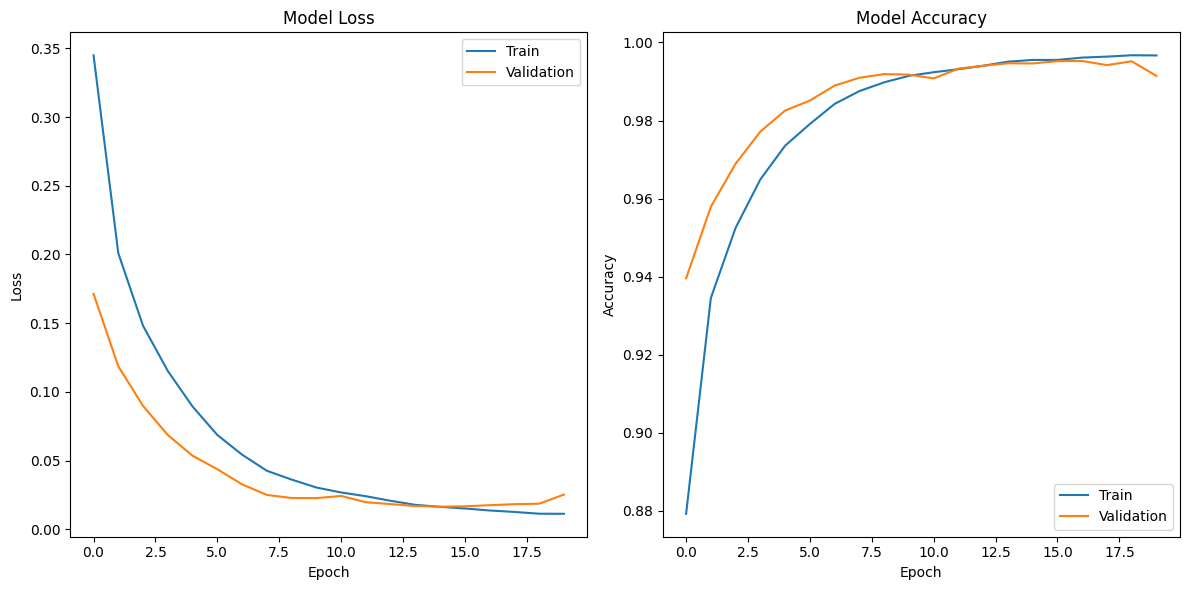

In [37]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
modelcnn.save("modelcnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


733/733 [==============================] - 1s 2ms/step
Test f1_score : 96.57%


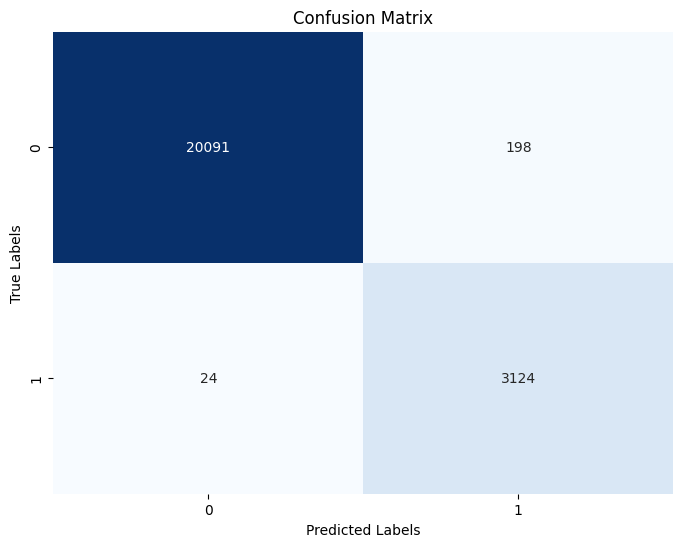

In [38]:
import seaborn as sns
# Evaluate the model on the test data
y_pred = modelcnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##With LR .0001 and SGD optimizer



In [39]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=10)

# Initialize a Sequential model
modelcnn = Sequential()

# Add a 1D convolutional layer
modelcnn.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
modelcnn.add(Flatten())

modelcnn.add(Dense(256, activation='relu'))


# Add a fully connected layer
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
modelcnn.add(Dense(64, activation='relu'))
modelcnn.add(Dropout(0.5))


modelcnn.add(Dense(32, activation='relu'))
modelcnn.add(Dropout(0.5))


# Add the output layer with softmax activation
modelcnn.add(Dense(2, activation='softmax'))
optimizer = tf.keras.optimizers.experimental.SGD(learning_rate=0.0001)
# Compile the model
modelcnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = modelcnn.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
6836/6836 [==============================] - 37s 5ms/step - loss: 0.5968 - accuracy: 0.7235 - val_loss: 0.3678 - val_accuracy: 0.8776
Epoch 2/20
6836/6836 [==============================] - 35s 5ms/step - loss: 0.4313 - accuracy: 0.8603 - val_loss: 0.3017 - val_accuracy: 0.8978
Epoch 3/20
6836/6836 [==============================] - 35s 5ms/step - loss: 0.3777 - accuracy: 0.8782 - val_loss: 0.2762 - val_accuracy: 0.9030
Epoch 4/20
6836/6836 [==============================] - 36s 5ms/step - loss: 0.3424 - accuracy: 0.8858 - val_loss: 0.2584 - val_accuracy: 0.9055
Epoch 5/20
6836/6836 [==============================] - 33s 5ms/step - loss: 0.3191 - accuracy: 0.8908 - val_loss: 0.2432 - val_accuracy: 0.9071
Epoch 6/20
6836/6836 [==============================] - 36s 5ms/step - loss: 0.3015 - accuracy: 0.8942 - val_loss: 0.2307 - val_accuracy: 0.9090
Epoch 7/20
6836/6836 [==============================] - 35s 5ms/step - loss: 0.2848 - accuracy: 0.8976 - val_loss: 0.2202 - val_ac

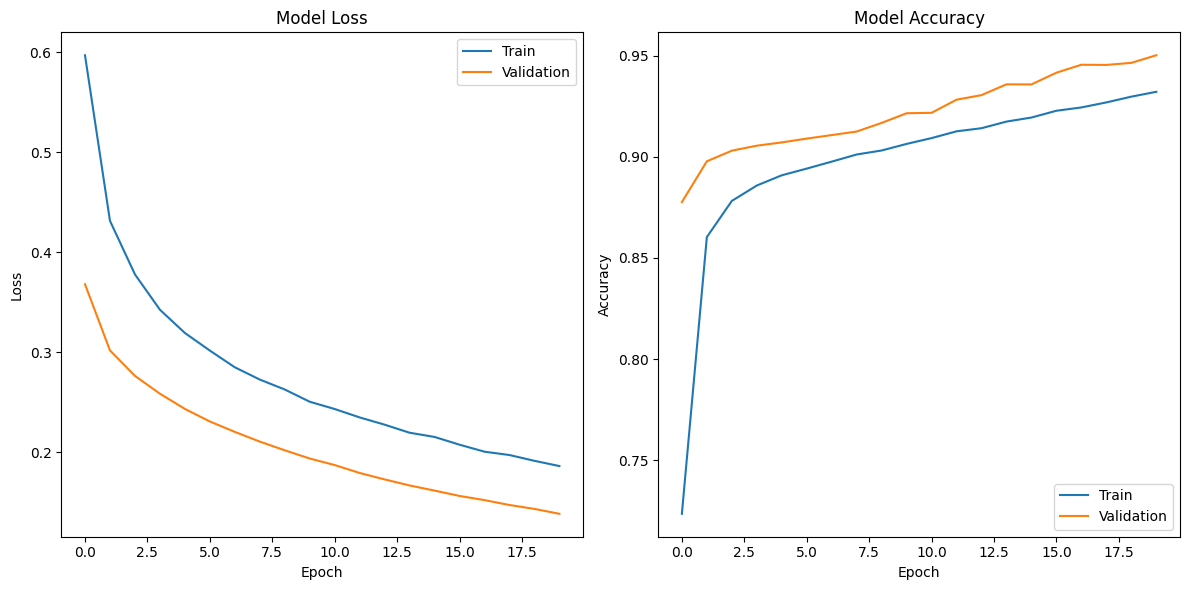

In [40]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
modelcnn.save("modelcnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


733/733 [==============================] - 1s 2ms/step
Test f1_score : 78.64%


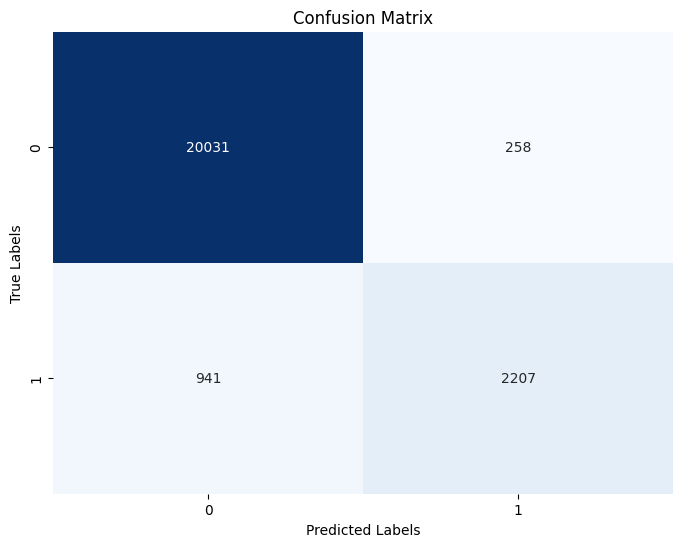

In [42]:
import seaborn as sns
# Evaluate the model on the test data
y_pred = modelcnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##With LR .0001 and Adam optimizer 32 batch



In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=10)

# Initialize a Sequential model
modelcnn = Sequential()

# Add a 1D convolutional layer
modelcnn.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
modelcnn.add(Flatten())

modelcnn.add(Dense(256, activation='relu'))


# Add a fully connected layer
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
modelcnn.add(Dense(64, activation='relu'))
modelcnn.add(Dropout(0.5))


modelcnn.add(Dense(32, activation='relu'))
modelcnn.add(Dropout(0.5))


# Add the output layer with softmax activation
modelcnn.add(Dense(2, activation='softmax'))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001)
# Compile the model
modelcnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = modelcnn.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
3418/3418 [==============================] - 16s 4ms/step - loss: 0.2119 - accuracy: 0.9270 - val_loss: 0.0903 - val_accuracy: 0.9683
Epoch 2/20
3418/3418 [==============================] - 16s 5ms/step - loss: 0.0903 - accuracy: 0.9716 - val_loss: 0.0482 - val_accuracy: 0.9822
Epoch 3/20
3418/3418 [==============================] - 16s 5ms/step - loss: 0.0547 - accuracy: 0.9831 - val_loss: 0.0304 - val_accuracy: 0.9891
Epoch 4/20
3418/3418 [==============================] - 21s 6ms/step - loss: 0.0384 - accuracy: 0.9882 - val_loss: 0.0276 - val_accuracy: 0.9906
Epoch 5/20
3418/3418 [==============================] - 17s 5ms/step - loss: 0.0292 - accuracy: 0.9911 - val_loss: 0.0273 - val_accuracy: 0.9907
Epoch 6/20
3418/3418 [==============================] - 15s 4ms/step - loss: 0.0247 - accuracy: 0.9929 - val_loss: 0.0244 - val_accuracy: 0.9926
Epoch 7/20
3418/3418 [==============================] - 18s 5ms/step - loss: 0.0212 - accuracy: 0.9939 - val_loss: 0.0289 - val_ac

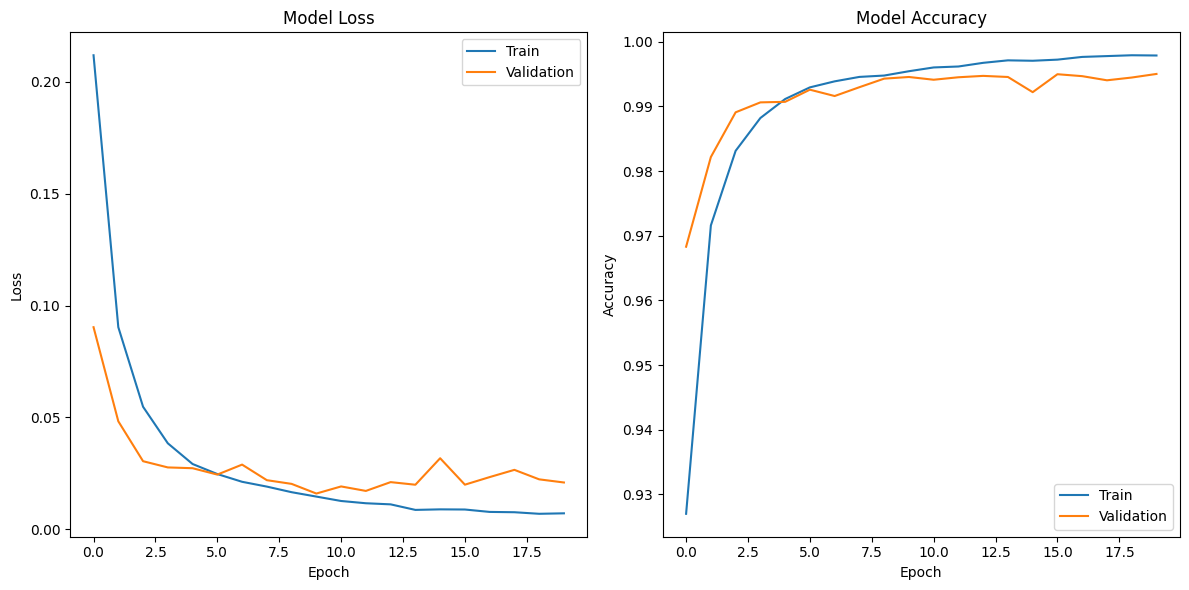

In [44]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
modelcnn.save("modelcnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


733/733 [==============================] - 1s 2ms/step
Test f1_score : 98.52%


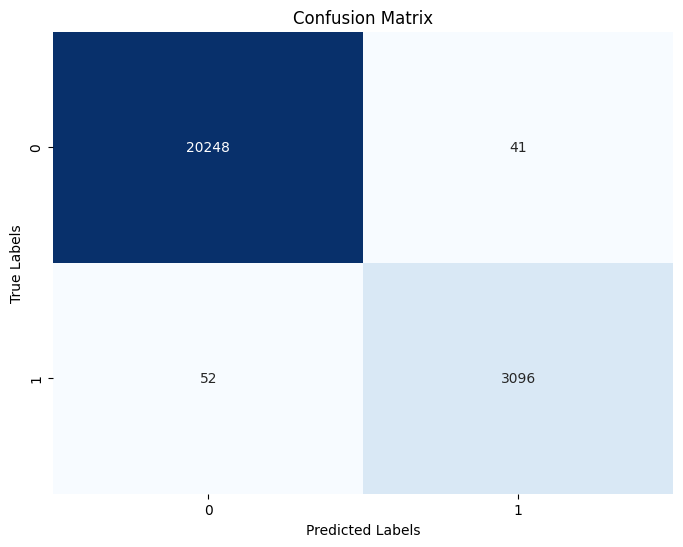

In [45]:
import seaborn as sns
# Evaluate the model on the test data
y_pred = modelcnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##With LR .0001 and Adam optimizer 64 batch



In [46]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=10)

# Initialize a Sequential model
modelcnn = Sequential()

# Add a 1D convolutional layer
modelcnn.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
modelcnn.add(Flatten())

modelcnn.add(Dense(256, activation='relu'))


# Add a fully connected layer
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
modelcnn.add(Dense(64, activation='relu'))
modelcnn.add(Dropout(0.5))


modelcnn.add(Dense(32, activation='relu'))
modelcnn.add(Dropout(0.5))


# Add the output layer with softmax activation
modelcnn.add(Dense(2, activation='softmax'))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001)
# Compile the model
modelcnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = modelcnn.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
1709/1709 [==============================] - 9s 5ms/step - loss: 0.2373 - accuracy: 0.9213 - val_loss: 0.1161 - val_accuracy: 0.9551
Epoch 2/20
1709/1709 [==============================] - 7s 4ms/step - loss: 0.1072 - accuracy: 0.9662 - val_loss: 0.0540 - val_accuracy: 0.9815
Epoch 3/20
1709/1709 [==============================] - 8s 5ms/step - loss: 0.0628 - accuracy: 0.9808 - val_loss: 0.0384 - val_accuracy: 0.9855
Epoch 4/20
1709/1709 [==============================] - 8s 5ms/step - loss: 0.0427 - accuracy: 0.9873 - val_loss: 0.0303 - val_accuracy: 0.9891
Epoch 5/20
1709/1709 [==============================] - 11s 6ms/step - loss: 0.0316 - accuracy: 0.9908 - val_loss: 0.0237 - val_accuracy: 0.9916
Epoch 6/20
1709/1709 [==============================] - 8s 5ms/step - loss: 0.0257 - accuracy: 0.9922 - val_loss: 0.0237 - val_accuracy: 0.9920
Epoch 7/20
1709/1709 [==============================] - 8s 5ms/step - loss: 0.0215 - accuracy: 0.9937 - val_loss: 0.0197 - val_accuracy

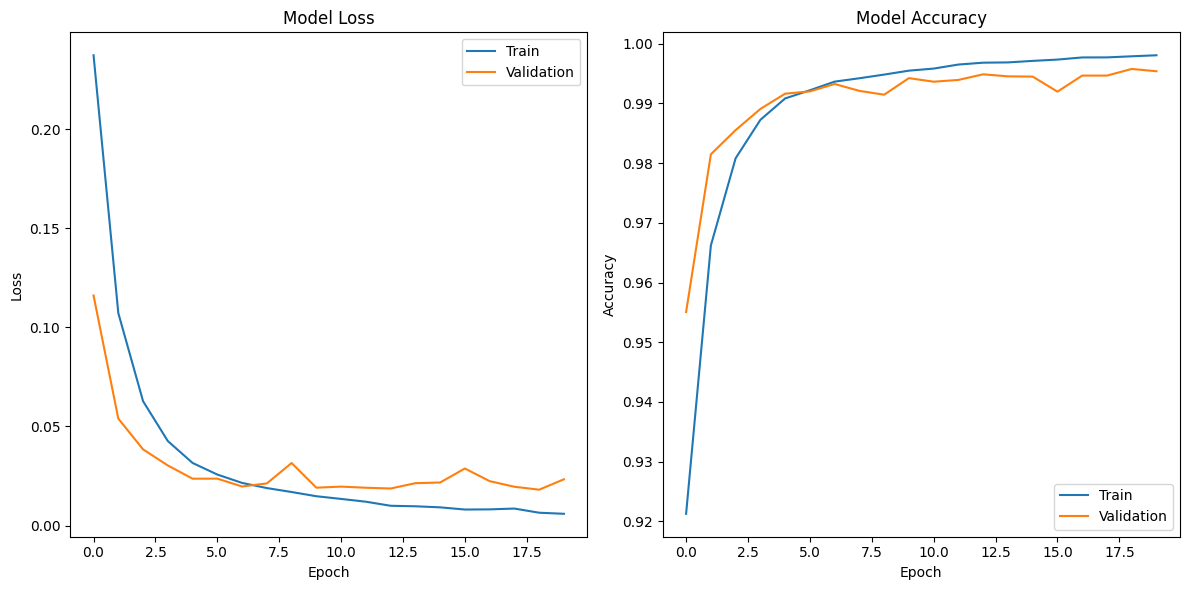

In [47]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
modelcnn.save("modelcnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


733/733 [==============================] - 1s 2ms/step
Test f1_score : 98.41%


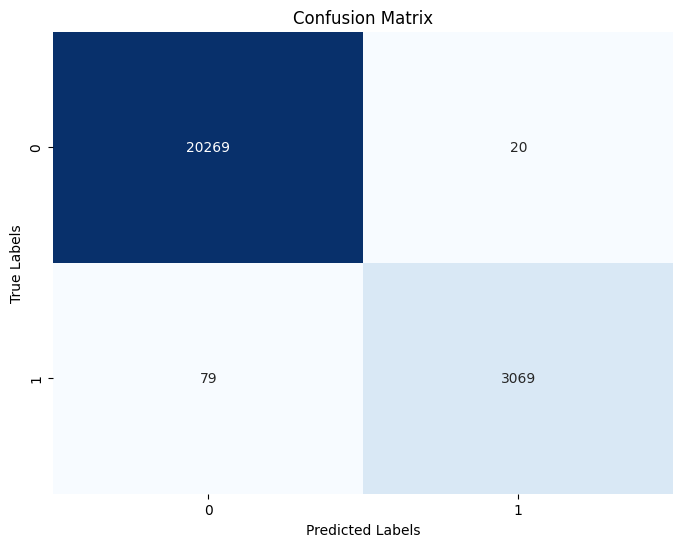

In [48]:
import seaborn as sns
# Evaluate the model on the test data
y_pred = modelcnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


##With LR .0001 and Adam optimizer 128 batch



In [49]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=10)

# Initialize a Sequential model
modelcnn = Sequential()

# Add a 1D convolutional layer
modelcnn.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Add a max pooling layer
# model.add(MaxPooling1D(pool_size=2))

# Flatten the output
modelcnn.add(Flatten())

modelcnn.add(Dense(256, activation='relu'))


# Add a fully connected layer
modelcnn.add(Dense(128, activation='relu'))
modelcnn.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
modelcnn.add(Dense(64, activation='relu'))
modelcnn.add(Dropout(0.5))


modelcnn.add(Dense(32, activation='relu'))
modelcnn.add(Dropout(0.5))


# Add the output layer with softmax activation
modelcnn.add(Dense(2, activation='softmax'))
optimizer = tf.compat.v1.train.AdamOptimizer(learning_rate=0.0001)
# Compile the model
modelcnn.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = modelcnn.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
855/855 [==============================] - 5s 5ms/step - loss: 0.2423 - accuracy: 0.9192 - val_loss: 0.1185 - val_accuracy: 0.9564
Epoch 2/20
855/855 [==============================] - 4s 5ms/step - loss: 0.1251 - accuracy: 0.9605 - val_loss: 0.0697 - val_accuracy: 0.9760
Epoch 3/20
855/855 [==============================] - 5s 5ms/step - loss: 0.0821 - accuracy: 0.9752 - val_loss: 0.0472 - val_accuracy: 0.9831
Epoch 4/20
855/855 [==============================] - 4s 5ms/step - loss: 0.0543 - accuracy: 0.9839 - val_loss: 0.0335 - val_accuracy: 0.9883
Epoch 5/20
855/855 [==============================] - 4s 4ms/step - loss: 0.0397 - accuracy: 0.9879 - val_loss: 0.0260 - val_accuracy: 0.9906
Epoch 6/20
855/855 [==============================] - 5s 5ms/step - loss: 0.0321 - accuracy: 0.9907 - val_loss: 0.0225 - val_accuracy: 0.9925
Epoch 7/20
855/855 [==============================] - 4s 5ms/step - loss: 0.0253 - accuracy: 0.9927 - val_loss: 0.0228 - val_accuracy: 0.9930
Epoch 

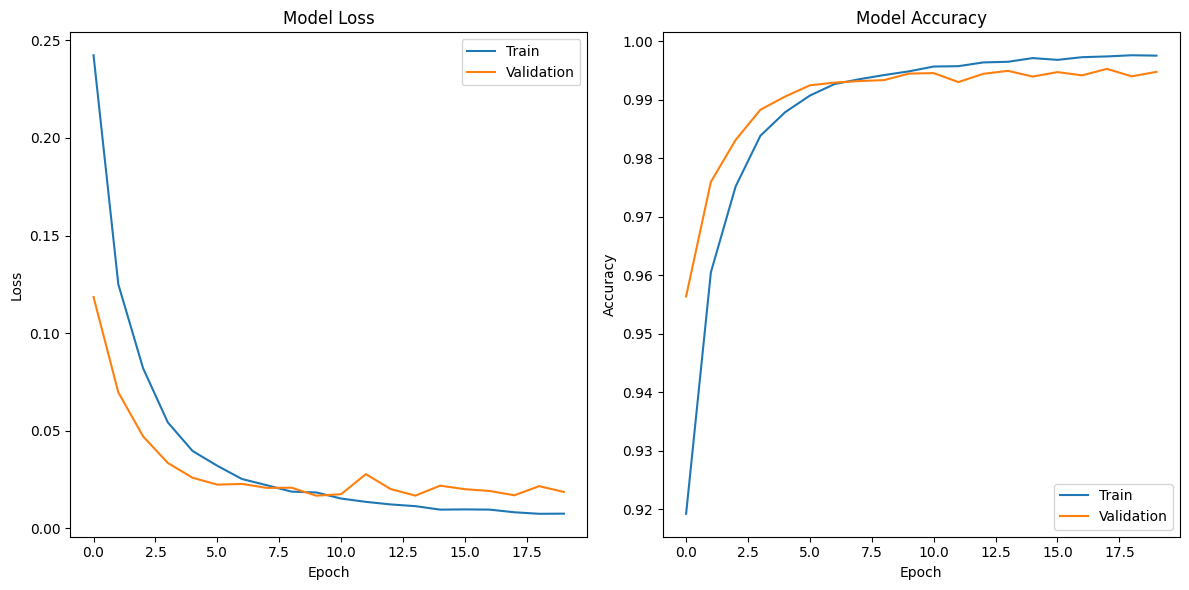

In [50]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

# Plot training & validation accuracy values
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')

plt.tight_layout()
plt.show()


In [ ]:
modelcnn.save("modelcnn.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


733/733 [==============================] - 1s 2ms/step
Test f1_score : 98.39%


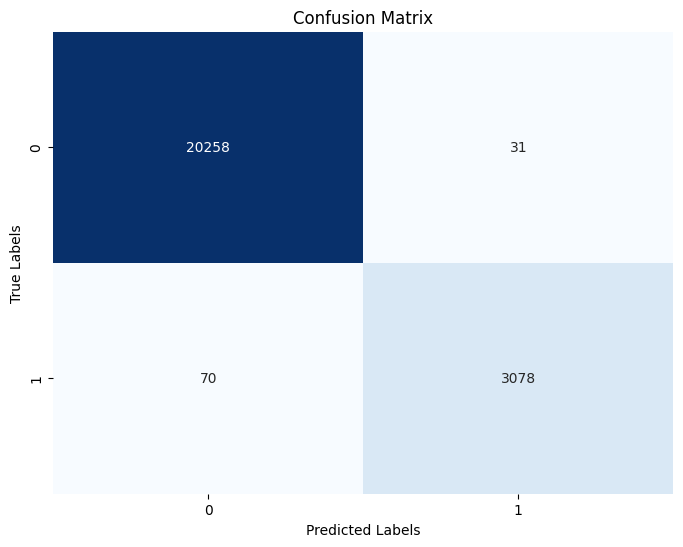

In [51]:
import seaborn as sns
# Evaluate the model on the test data
y_pred = modelcnn.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#LSTM

# with 16 batch

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model2 = Sequential()

# Add an LSTM layer
model2.add(LSTM(256, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model2.add(Dense(128, activation='relu'))

# Add an additional Dense layer with 64 units and relu activation
model2.add(Dense(64, activation='relu'))

# Add an additional Dense layer with 32 units and relu activation
model2.add(Dense(32, activation='relu'))


# Add the output layer with softmax activation
model2.add(Dense(2, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=16, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
6836/6836 [==============================] - 89s 10ms/step - loss: 0.2525 - accuracy: 0.9041 - val_loss: 0.1391 - val_accuracy: 0.9379
Epoch 2/20
6836/6836 [==============================] - 61s 9ms/step - loss: 0.0910 - accuracy: 0.9647 - val_loss: 0.0968 - val_accuracy: 0.9595
Epoch 3/20
6836/6836 [==============================] - 61s 9ms/step - loss: 0.0592 - accuracy: 0.9775 - val_loss: 0.0450 - val_accuracy: 0.9824
Epoch 4/20
6836/6836 [==============================] - 69s 10ms/step - loss: 0.0485 - accuracy: 0.9818 - val_loss: 0.0380 - val_accuracy: 0.9857
Epoch 5/20
6836/6836 [==============================] - 62s 9ms/step - loss: 0.0419 - accuracy: 0.9847 - val_loss: 0.0689 - val_accuracy: 0.9733
Epoch 6/20
6836/6836 [==============================] - 61s 9ms/step - loss: 0.0363 - accuracy: 0.9864 - val_loss: 0.0352 - val_accuracy: 0.9873
Epoch 7/20
6836/6836 [==============================] - 63s 9ms/step - loss: 0.0343 - accuracy: 0.9874 - val_loss: 0.0311 - val_

In [54]:
# Evaluate the model on the test data
test_loss, test_accuracy = model2.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

733/733 - 3s - loss: 0.0248 - accuracy: 0.9911 - 3s/epoch - 4ms/step
Test Accuracy: 99.11%


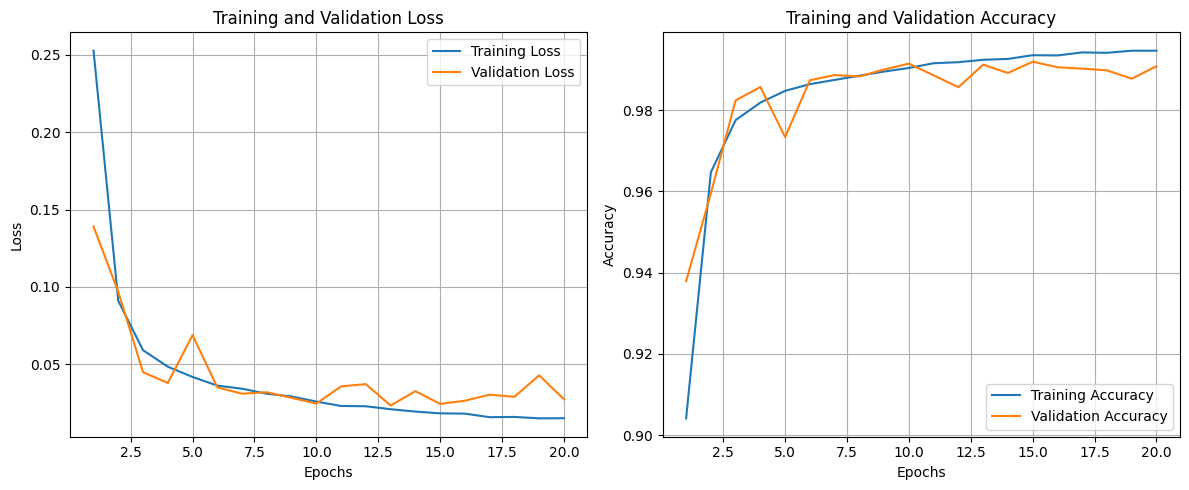

In [55]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
model2.save("modelstm.h5")

733/733 [==============================] - 3s 3ms/step
Test f1_score : 96.63%


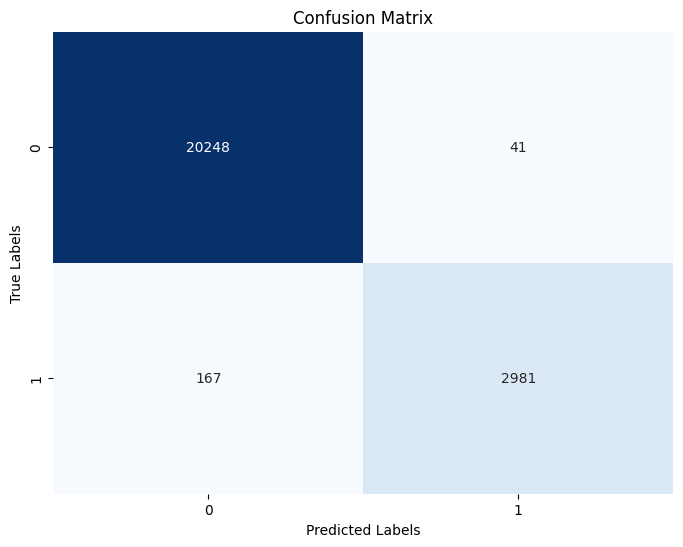

In [56]:
# Evaluate the model on the test data
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#LSTM

# with 32 batch

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model2 = Sequential()

# Add an LSTM layer
model2.add(LSTM(256, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model2.add(Dense(128, activation='relu'))

# Add an additional Dense layer with 64 units and relu activation
model2.add(Dense(64, activation='relu'))

# Add an additional Dense layer with 32 units and relu activation
model2.add(Dense(32, activation='relu'))


# Add the output layer with softmax activation
model2.add(Dense(2, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
3418/3418 [==============================] - 37s 10ms/step - loss: 0.3928 - accuracy: 0.8659 - val_loss: 0.3861 - val_accuracy: 0.8657
Epoch 2/20
3418/3418 [==============================] - 31s 9ms/step - loss: 0.2305 - accuracy: 0.9124 - val_loss: 0.1233 - val_accuracy: 0.9507
Epoch 3/20
3418/3418 [==============================] - 31s 9ms/step - loss: 0.1050 - accuracy: 0.9582 - val_loss: 0.1535 - val_accuracy: 0.9489
Epoch 4/20
3418/3418 [==============================] - 32s 9ms/step - loss: 0.0782 - accuracy: 0.9695 - val_loss: 0.0611 - val_accuracy: 0.9774
Epoch 5/20
3418/3418 [==============================] - 30s 9ms/step - loss: 0.0554 - accuracy: 0.9793 - val_loss: 0.0450 - val_accuracy: 0.9839
Epoch 6/20
3418/3418 [==============================] - 30s 9ms/step - loss: 0.0459 - accuracy: 0.9829 - val_loss: 0.0624 - val_accuracy: 0.9761
Epoch 7/20
3418/3418 [==============================] - 31s 9ms/step - loss: 0.0401 - accuracy: 0.9851 - val_loss: 0.0386 - val_a

In [58]:
# Evaluate the model on the test data
test_loss, test_accuracy = model2.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

733/733 - 3s - loss: 0.0224 - accuracy: 0.9921 - 3s/epoch - 4ms/step
Test Accuracy: 99.21%


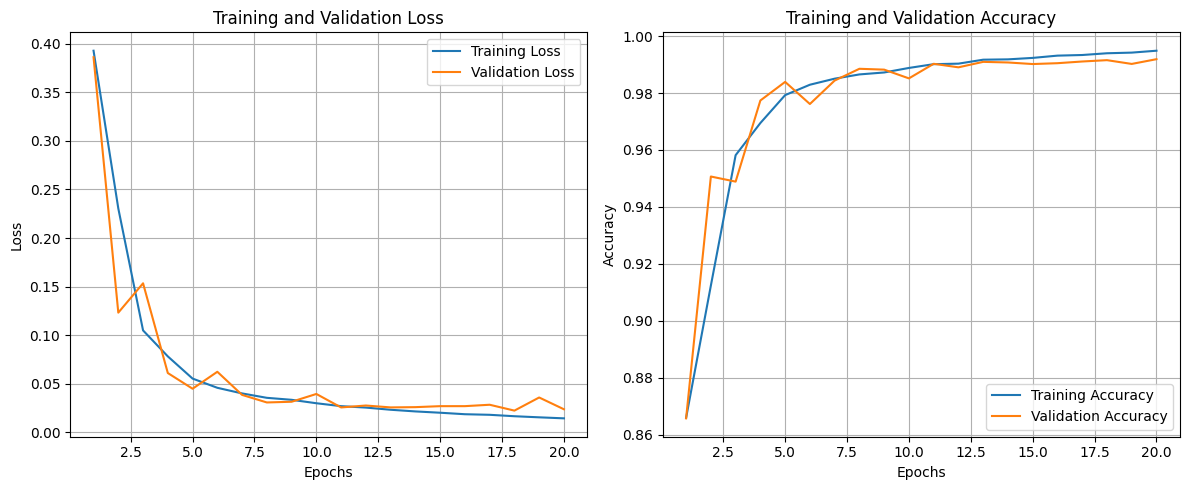

In [59]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
model2.save("modelstm.h5")

733/733 [==============================] - 3s 3ms/step
Test f1_score : 97.05%


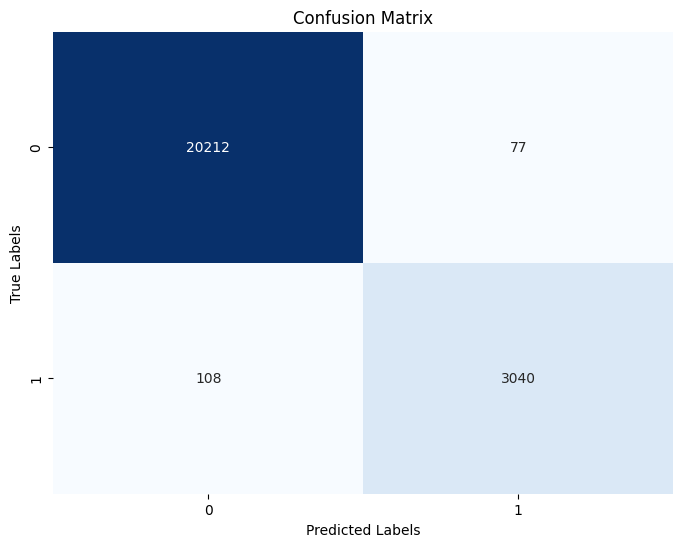

In [60]:
# Evaluate the model on the test data
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#LSTM

# with 64 batch

In [61]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model2 = Sequential()

# Add an LSTM layer
model2.add(LSTM(256, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model2.add(Dense(128, activation='relu'))

# Add an additional Dense layer with 64 units and relu activation
model2.add(Dense(64, activation='relu'))

# Add an additional Dense layer with 32 units and relu activation
model2.add(Dense(32, activation='relu'))


# Add the output layer with softmax activation
model2.add(Dense(2, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
1709/1709 [==============================] - 23s 12ms/step - loss: 0.3356 - accuracy: 0.8843 - val_loss: 0.1907 - val_accuracy: 0.9348
Epoch 2/20
1709/1709 [==============================] - 19s 11ms/step - loss: 0.1190 - accuracy: 0.9539 - val_loss: 0.0742 - val_accuracy: 0.9713
Epoch 3/20
1709/1709 [==============================] - 19s 11ms/step - loss: 0.0629 - accuracy: 0.9769 - val_loss: 0.0535 - val_accuracy: 0.9798
Epoch 4/20
1709/1709 [==============================] - 18s 11ms/step - loss: 0.0492 - accuracy: 0.9820 - val_loss: 0.0333 - val_accuracy: 0.9883
Epoch 5/20
1709/1709 [==============================] - 19s 11ms/step - loss: 0.0400 - accuracy: 0.9851 - val_loss: 0.0444 - val_accuracy: 0.9816
Epoch 6/20
1709/1709 [==============================] - 18s 10ms/step - loss: 0.0356 - accuracy: 0.9867 - val_loss: 0.0354 - val_accuracy: 0.9872
Epoch 7/20
1709/1709 [==============================] - 19s 11ms/step - loss: 0.0325 - accuracy: 0.9880 - val_loss: 0.0299 -

In [62]:
# Evaluate the model on the test data
test_loss, test_accuracy = model2.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

733/733 - 3s - loss: 0.0198 - accuracy: 0.9934 - 3s/epoch - 4ms/step
Test Accuracy: 99.34%


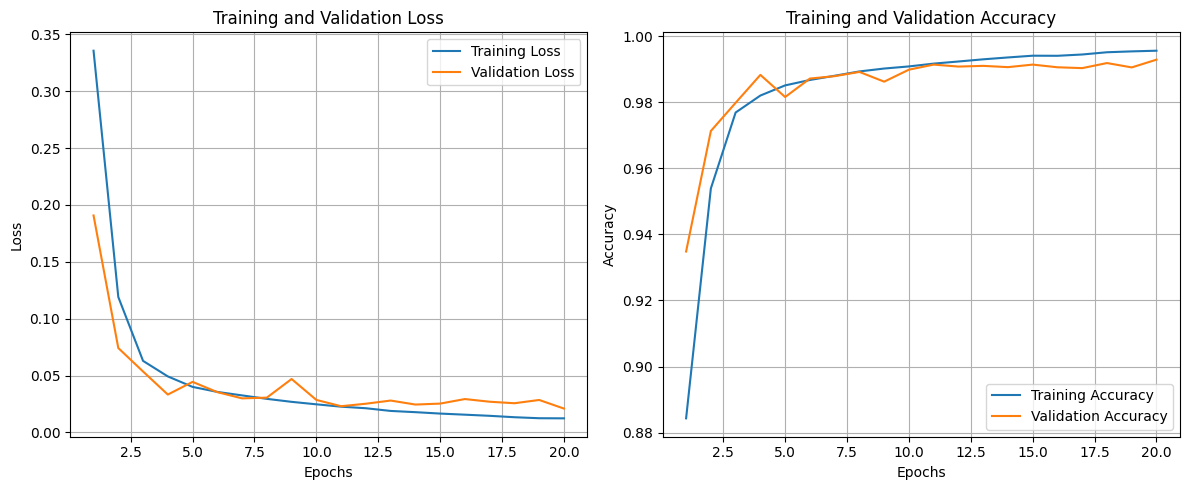

In [63]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
model2.save("modelstm.h5")

733/733 [==============================] - 3s 3ms/step
Test f1_score : 97.52%


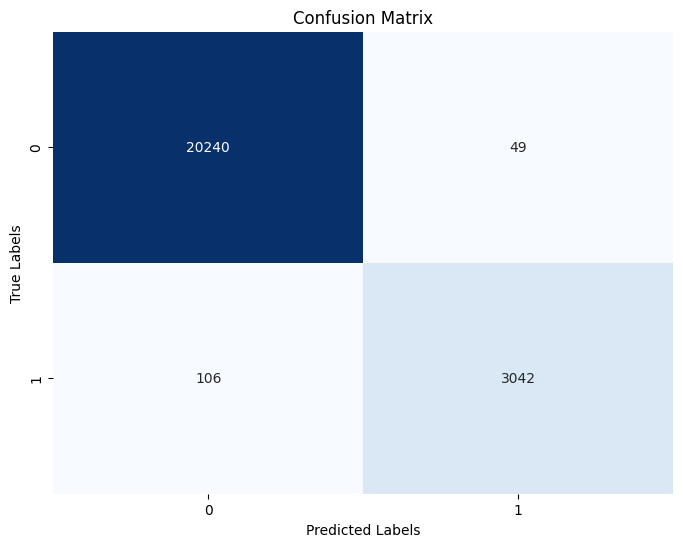

In [64]:
# Evaluate the model on the test data
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#LSTM

# with 128 batch

In [65]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Activation
from tensorflow.keras.optimizers import Adam

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model2 = Sequential()

# Add an LSTM layer
model2.add(LSTM(256, input_shape=(X_train.shape[1], 1)))

# Add a fully connected layer
model2.add(Dense(128, activation='relu'))

# Add an additional Dense layer with 64 units and relu activation
model2.add(Dense(64, activation='relu'))

# Add an additional Dense layer with 32 units and relu activation
model2.add(Dense(32, activation='relu'))


# Add the output layer with softmax activation
model2.add(Dense(2, activation='softmax'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history2 = model2.fit(X_train, y_train, epochs=20, batch_size=128, validation_data=(X_val, y_val), callbacks=[callback])

Epoch 1/20
855/855 [==============================] - 57s 16ms/step - loss: 0.3269 - accuracy: 0.8868 - val_loss: 0.2333 - val_accuracy: 0.9238
Epoch 2/20
855/855 [==============================] - 13s 15ms/step - loss: 0.1823 - accuracy: 0.9320 - val_loss: 0.1019 - val_accuracy: 0.9619
Epoch 3/20
855/855 [==============================] - 13s 15ms/step - loss: 0.0976 - accuracy: 0.9613 - val_loss: 0.0922 - val_accuracy: 0.9647
Epoch 4/20
855/855 [==============================] - 13s 15ms/step - loss: 0.0636 - accuracy: 0.9755 - val_loss: 0.0555 - val_accuracy: 0.9778
Epoch 5/20
855/855 [==============================] - 13s 15ms/step - loss: 0.0493 - accuracy: 0.9819 - val_loss: 0.0422 - val_accuracy: 0.9854
Epoch 6/20
855/855 [==============================] - 13s 15ms/step - loss: 0.0399 - accuracy: 0.9852 - val_loss: 0.0320 - val_accuracy: 0.9889
Epoch 7/20
855/855 [==============================] - 13s 16ms/step - loss: 0.0364 - accuracy: 0.9865 - val_loss: 0.0286 - val_accuracy:

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model2.evaluate(X_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

In [ ]:
import matplotlib.pyplot as plt

# Get the training and validation loss and accuracy from the history object
train_loss = history2.history['loss']
val_loss = history2.history['val_loss']
train_accuracy = history2.history['accuracy']
val_accuracy = history2.history['val_accuracy']

# Create a range of values for the x-axis (epochs)
epochs = range(1, len(train_loss) + 1)

# Create subplots for loss and accuracy
plt.figure(figsize=(12, 5))

# Plot the training and validation loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()

# Plot the training and validation accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [ ]:
model2.save("modelstm.h5")

733/733 [==============================] - 3s 3ms/step
Test f1_score : 97.10%


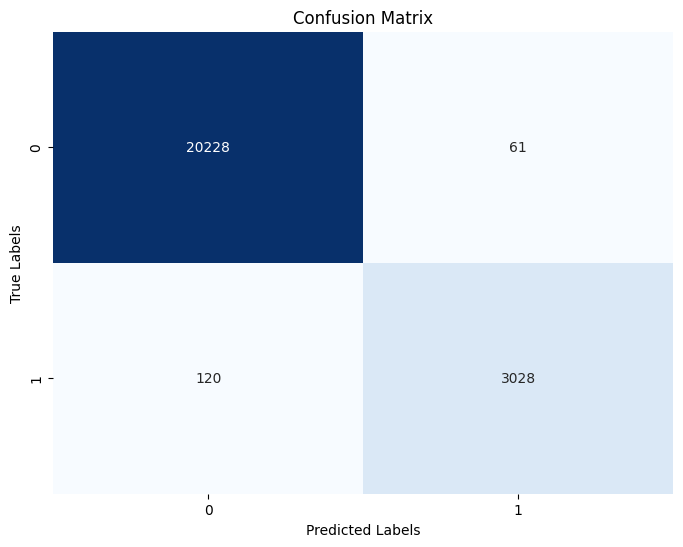

In [68]:
# Evaluate the model on the test data
y_pred = model2.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute the F1 score

from sklearn.metrics import f1_score
f1=f1_score(np.argmax(np.array(y_test), axis=1), y_pred_classes)
print(f"Test f1_score : {f1 * 100:.2f}%")

# Compute the confusion matrix
confusion = confusion_matrix(np.argmax(np.array(y_test), axis=1), y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


#Testng on Real Data

In [ ]:
import os
import torch
import torchaudio
import pandas as pd
from tqdm import tqdm
import os
import librosa
import pandas as pd
import numpy as np

# Create an empty list to store the data

def getcsv(root_folder):
    data = []
    # Loop through the 'real' and 'fake' subfolders
    # for label in ['real', 'fake']:
    #     label_folder = os.path.join(root_folder, label)

    #     # Check if the folder exists
    #     if not os.path.exists(label_folder):
    #         continue

    #     # Loop through the audio files in each subfolder

    def features_extractor(file):
        audio, sample_rate = librosa.load(file, res_type='kaiser_fast')
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=100)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features

    def iterate_folder_and_extract_features(folder_path):
        extracted_features = []
        for file_name in tqdm(os.listdir(folder_path)):
            file_path = os.path.join(folder_path, file_name)
            if file_path.endswith(".wav"):  # Assuming the audio files are in WAV format
                data = features_extractor(file_path)
                extracted_features.append([data])



        return extracted_features


    # Assuming 'df' has an 'mfcc' column with MFCC lists


    data = pd.DataFrame(iterate_folder_and_extract_features(root_folder), columns=["mfcc_features"])



    df_expanded = pd.DataFrame(data["mfcc_features"].tolist())

    # # Combine the expanded MFCC columns with the original DataFrame
    # df_expanded = pd.concat([data[['label']], df_expanded], axis=1)

    # # The 'df_expanded' DataFrame now has each MFCC value in its own column

    # df_expanded.to_csv(f"df_{N_FFT}f",index=False)

    return df_expanded

c:\Users\aa\anaconda3\envs\ML\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\aa\anaconda3\envs\ML\lib\site-packages\torchaudio\extension\extension.py:13: UserWarning: torchaudio C++ extension is not available.
  warnings.warn('torchaudio C++ extension is not available.')


In [ ]:
#df=getcsv("C:\\Users\\aa\\Downloads\\VoxCeleb_gender\\New folder")

#df=getcsv("C:\\Users\\aa\\Downloads\\Elevenlabs_SAMPLE_DAVE_DOMI\\Domi")


#df = getcsv("C:\\Users\\aa\\Downloads\\badawy")

#df=getcsv("C:\\Users\\aa\\Downloads\\archive (2)\\Raw JL corpus (unchecked and unannotated)\\JL(wav+txt)")





#df = getcsv("C:\\Users\\aa\\Desktop\\New folder")


df = getcsv("C:\\Users\\aa\\Downloads\\Raw JL corpus (unchecked and unannotated)\\Perception test material on Qualtrics\\main_emotion\\main_survey_1\\page3")

100%|██████████| 10/10 [00:00<00:00, 37.34it/s]


In [ ]:
df=np.array(df)

df_s=df.reshape(df.shape[0], df.shape[1], 1)

In [ ]:
v=model.predict(df_s).argmax(axis=1)

1/1 [==============================] - 0s 113ms/step


In [ ]:
c = pd.DataFrame(v)

In [ ]:
c = pd.DataFrame(v)
print(c.value_counts())

1    10
dtype: int64


In [ ]:
model.save("last.h5")

In [ ]:
import pickle

with open("last.pkl", "wb") as f:
 pickle.dump(model, f)

INFO:tensorflow:Assets written to: ram://9864e387-1218-429c-a96f-2783c1e0857c/assets


INFO:tensorflow:Assets written to: ram://9864e387-1218-429c-a96f-2783c1e0857c/assets


In [ ]:
from keras.models import load_model
model = load_model('last.h5')

In [ ]:
y_pred=model.predict(df_s)

1/1 [==============================] - 0s 72ms/step


In [ ]:
y_pred

array([[0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00],
       [4.1739656e-24, 1.0000000e+00],
       [0.0000000e+00, 1.0000000e+00]], dtype=float32)

In [ ]:
import tensorflow as tf
import numpy as np



probabilities_class_0 = 1 - y_pred
probabilities_class_1 = y_pred

# Print the probabilities for each record
for i in range(len(y_pred)):
    print(f"Record {i + 1}: Probability for class 0 (fake): {probabilities_class_0[i][0]}, Probability for class 1 (real): {probabilities_class_1[i][0]}")


Record 1: Probability for class 0 (fake): 1.0, Probability for class 1 (real): 0.0
Record 2: Probability for class 0 (fake): 1.0, Probability for class 1 (real): 0.0
Record 3: Probability for class 0 (fake): 1.0, Probability for class 1 (real): 0.0
Record 4: Probability for class 0 (fake): 1.0, Probability for class 1 (real): 0.0
Record 5: Probability for class 0 (fake): 1.0, Probability for class 1 (real): 0.0
Record 6: Probability for class 0 (fake): 1.0, Probability for class 1 (real): 0.0
Record 7: Probability for class 0 (fake): 1.0, Probability for class 1 (real): 0.0
Record 8: Probability for class 0 (fake): 1.0, Probability for class 1 (real): 0.0
Record 9: Probability for class 0 (fake): 1.0, Probability for class 1 (real): 4.173965601442052e-24
Record 10: Probability for class 0 (fake): 1.0, Probability for class 1 (real): 0.0


In [ ]:
predict = tf.argmax(y_pred, axis=1)

In [ ]:
predict

<tf.Tensor: shape=(10,), dtype=int64, numpy=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)>

In [ ]:
c = pd.DataFrame(v)
print(c.value_counts())

1    10
dtype: int64


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping callback
callback = EarlyStopping(monitor='val_loss', patience=20)

# Initialize a Sequential model
model_new= Sequential()

# Add a 1D convolutional layer
model_new.add(Conv1D(filters=64, kernel_size=3, activation='tanh', input_shape=(X_train.shape[1], 1)))

# Flatten the output
model_new.add(Flatten())

model_new.add(Dense(256, activation='relu'))

# Add a fully connected layer
model_new.add(Dense(128, activation='relu'))
model_new.add(Dropout(0.5))

# Add an additional Dense layer with 32 units and relu activation
model_new.add(Dense(64, activation='relu'))
model_new.add(Dropout(0.5))

model_new.add(Dense(32, activation='relu'))
model_new.add(Dropout(0.5))

# Change the activation function in the output layer to 'sigmoid'
model_new.add(Dense(2, activation='sigmoid'))

# Compile the model
model_new.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model_new.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_val, y_val), callbacks=[callback] )


Epoch 1/20
3418/3418 [==============================] - 23s 6ms/step - loss: 0.1611 - accuracy: 0.9428 - val_loss: 0.0777 - val_accuracy: 0.9728
Epoch 2/20
3418/3418 [==============================] - 22s 6ms/step - loss: 0.0652 - accuracy: 0.9787 - val_loss: 0.0493 - val_accuracy: 0.9815
Epoch 3/20
3418/3418 [==============================] - 22s 6ms/step - loss: 0.0414 - accuracy: 0.9867 - val_loss: 0.0336 - val_accuracy: 0.9870
Epoch 4/20
3418/3418 [==============================] - 22s 6ms/step - loss: 0.0341 - accuracy: 0.9892 - val_loss: 0.0295 - val_accuracy: 0.9907
Epoch 5/20
3418/3418 [==============================] - 22s 6ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0281 - val_accuracy: 0.9908
Epoch 6/20
3418/3418 [==============================] - 22s 6ms/step - loss: 0.0261 - accuracy: 0.9919 - val_loss: 0.0299 - val_accuracy: 0.9910
Epoch 7/20
3418/3418 [==============================] - 22s 6ms/step - loss: 0.0250 - accuracy: 0.9927 - val_loss: 0.0228 - val_ac

In [ ]:
# model_new.save("last_pro.h5")

In [ ]:
# Assuming your model is already trained and stored in the 'model' variable

# Make predictions on the test data
predictions = model2.predict(X_test)

# Assuming predictions is a single-column array with values between 0 and 1
# You can interpret predictions as probabilities for class 1 (real)
# The probability for class 0 (fake) is simply 1 - predictions

probabilities_class_0 = 1 - predictions
probabilities_class_1 = predictions

# Print the probabilities for each record in the test set
for i in range(len(predictions)):
    print(f"Record {i + 1}: Probability for class 0 (fake): {probabilities_class_0[i][0]}, Probability for class 1 (real): {probabilities_class_1[i][0]}")


733/733 [==============================] - 2s 3ms/step
Record 1: Probability for class 0 (fake): 9.870529174804688e-05, Probability for class 1 (real): 0.999901294708252
Record 2: Probability for class 0 (fake): 3.814697265625e-06, Probability for class 1 (real): 0.9999961853027344
Record 3: Probability for class 0 (fake): 0.001190781593322754, Probability for class 1 (real): 0.9988092184066772
Record 4: Probability for class 0 (fake): 0.9999955892562866, Probability for class 1 (real): 4.43238377556554e-06
Record 5: Probability for class 0 (fake): 1.0728836059570312e-06, Probability for class 1 (real): 0.999998927116394
Record 6: Probability for class 0 (fake): 0.031432271003723145, Probability for class 1 (real): 0.9685677289962769
Record 7: Probability for class 0 (fake): 5.602836608886719e-06, Probability for class 1 (real): 0.9999943971633911
Record 8: Probability for class 0 (fake): 1.0, Probability for class 1 (real): 2.1030546193401278e-08
Record 9: Probability for class 0 (fak

In [ ]:
model2.save("last_pro5.h5")